In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Supplementary Figure

## Panel A: sample size vs. power for pairwise SNPxgene. 
Different lines for different betas. (here power: % of simulations for a single target that have p<0.05/m*n, where m=#SNPs, n=# genes in real data)

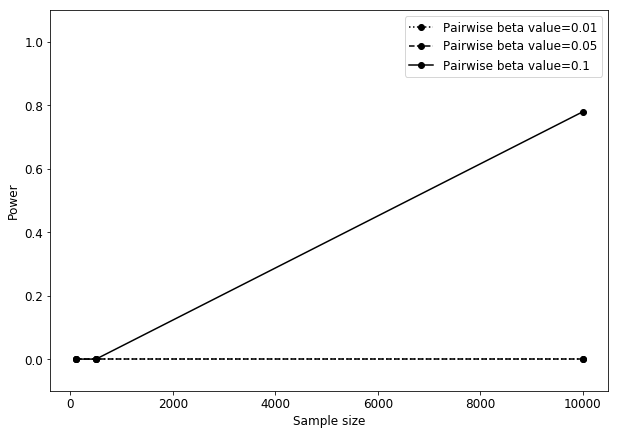

In [63]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}

plt.rc('font', **font)

def get_path(method, samplesize, target, betavalue, fname):
    if method == "pairwise":
        return  f'/gymreklab-tscc/cynthiawu/Test_nullsnps/simulate_eqtls_only/FastMultivariate/Single_eqtl/SampleSize{samplesize}/SingleParameter/numTarget_{target}/Beta_{betavalue}/{fname}'
    elif method == "CPMA":
        return f'/gymreklab-tscc/cynthiawu/Test_nullsnps/simulate_eqtls_only/FastMultivariate/Single_eqtl/SampleSize{samplesize}/SingleParameter/numTarget_{target}/Beta_{betavalue}/{fname}'
    else: return None

def plot_power(target, beta_values, samplesize, fname, label_name, method, color="black", linestyles=None):
    for beta in beta_values:
        power = []
        for s in samplesize:   
            value = str(beta).replace(".","")
            path = get_path(method, s, target, value, fname)
            cur_file = pd.read_csv(path, sep='\t')
            power.append(float(cur_file['power_adjusted']))
        if linestyles is None:
            ls = "solid"
        else: ls = linestyles[beta_values.index(beta)]
        plt.plot(samplesize, power, label=f'{label_name}={beta}', marker='o', color=color, linestyle=ls)
        
    
plt.figure(figsize=(10,7))


#beta_values = [0, 0.01, 0.1, 1]
beta_values = [0.01, 0.05, 0.1]
# beta_values = [0.05]

samplesize = [100, 500, 10000]
target = 1

# plot_power(target, beta_values, samplesize, 'power_cpmax_1.0_adjusted_realnumsnps.txt', 'CPMA_x 1.0 beta_value')
plot_power(target, beta_values, samplesize, 'power_matrix-eqtl_onesuccess_realnumsnps.txt', 'Pairwise beta value',
           "pairwise", linestyles=["dotted", "dashed", "solid"]) 
# plot_power(target, beta_values, samplesize, 'power_mixtureModel_adjusted_realnumsnps.txt', 'mixtureModel beta_value')

plt.xlabel('Sample size')
plt.ylabel('Power')
plt.ylim(-0.1, 1.1)
plt.grid(False)
#plt.xscale("log")
plt.legend();

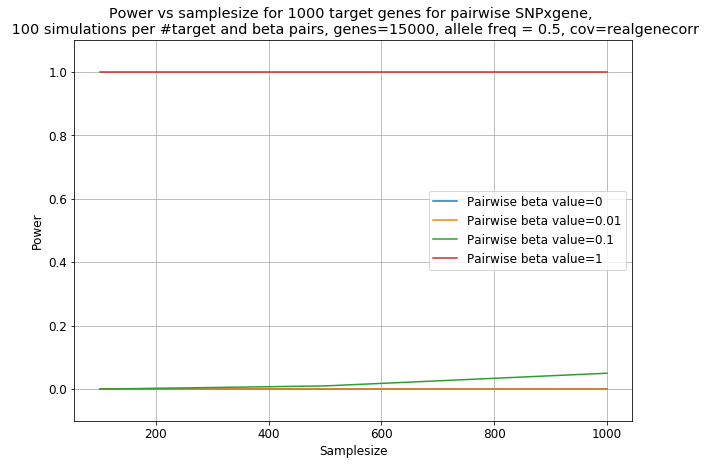

In [5]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}

plt.rc('font', **font)

def plot_power(target, beta_values, samplesize, fname, label_name):
    power = []
    for beta in beta_values:
        for s in samplesize:   
            value = str(beta).replace(".","")
            path = f'/gymreklab-tscc/cynthiawu/Test_nullsnps/simulate_eqtls_only/FastMultivariate/Single_eqtl/SampleSize{s}/SingleParameter/numTarget_{target}/Beta_{value}/{fname}'
            cur_file = pd.read_csv(path, sep='\t')
            power.append(float(cur_file['power_adjusted']))
        plt.plot(samplesize, power, label=f'{label_name}={beta}')
        power = []
    
plt.figure(figsize=(10,7))


beta_values = [0, 0.01, 0.1, 1]

samplesize = [100, 500, 1000]
target = 1000

# plot_power(target, beta_values, samplesize, 'power_cpmax_1.0_adjusted_realnumsnps.txt', 'CPMA_x 1.0 beta_value')
plot_power(target, beta_values, samplesize, 'power_matrix-eqtl_onesuccess_realnumsnps.txt', 'Pairwise beta value') 
# plot_power(target, beta_values, samplesize, 'power_mixtureModel_adjusted_realnumsnps.txt', 'mixtureModel beta_value')

      
plt.xlabel('Samplesize')
plt.ylabel('Power')
plt.title('Power vs samplesize for 1000 target genes for pairwise SNPxgene, \n 100 simulations per #target and beta pairs, genes=15000, allele freq = 0.5, cov=realgenecorr')
plt.ylim(-0.1, 1.1)
plt.grid(True)
plt.legend()
    

## Panels B-D: sample size vs. power for CPMA
different lines for different betas.(here power: % simulations where p<0.05/m) B-D can be for a range of target sizes (maybe like 10, 100, 1000?)

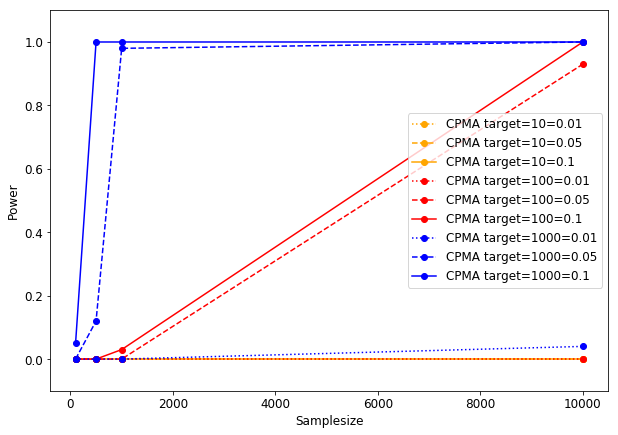

In [64]:
plt.figure(figsize=(10,7))


beta_values = [ 0.01, 0.05, 0.1]
samplesize = [100, 500, 1000, 10000]
target_colors = {
#     1:"green",
   10: "orange",
    100: "red",
    1000: "blue"
}
for target in [10,100,1000]:
    plot_power(target, beta_values, samplesize, 'power_cpmax_1.0_adjusted_realnumsnps.txt', 'CPMA target=%s'%target,
              "CPMA", linestyles=["dotted", "dashed","solid"], color=target_colors[target])

      
plt.xlabel('Samplesize')
plt.ylabel('Power')
plt.ylim(-0.1, 1.1)
#plt.xscale("log")
plt.legend()

### B: Target genes = 10

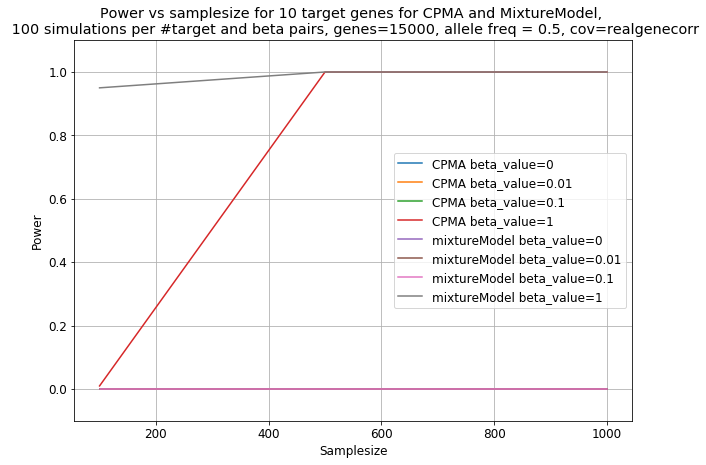

In [31]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}

plt.rc('font', **font)

def plot_power(target, beta_values, samplesize, fname, label_name):
    power = []
    for beta in beta_values:
        for s in samplesize:   
            value = str(beta).replace(".","")
            path = f'/gymreklab-tscc/cynthiawu/Test_nullsnps/simulate_eqtls_only/FastMultivariate/Single_eqtl/SampleSize{s}/SingleParameter/numTarget_{target}/Beta_{value}/{fname}'
            cur_file = pd.read_csv(path, sep='\t')
            power.append(float(cur_file['power_adjusted']))
        plt.plot(samplesize, power, label=f'{label_name}={beta}')
        power = []
    
plt.figure(figsize=(10,7))


beta_values = [0, 0.01, 0.1, 1]

samplesize = [100, 500, 1000]
target = 10

plot_power(target, beta_values, samplesize, 'power_cpmax_1.0_adjusted_realnumsnps.txt', 'CPMA beta_value')
# plot_power(target, beta_values, samplesize, 'power_matrix-eqtl_onesuccess_realnumsnps.txt', 'Pairwise beta value') 
plot_power(target, beta_values, samplesize, 'power_mixtureModel_adjusted_realnumsnps.txt', 'mixtureModel beta_value')

      
plt.xlabel('Samplesize')
plt.ylabel('Power')
plt.title('Power vs samplesize for 10 target genes for CPMA and MixtureModel, \n 100 simulations per #target and beta pairs, genes=15000, allele freq = 0.5, cov=realgenecorr')
plt.ylim(-0.1, 1.1)
plt.grid(True)
plt.legend()
    

### C: Target genes = 100

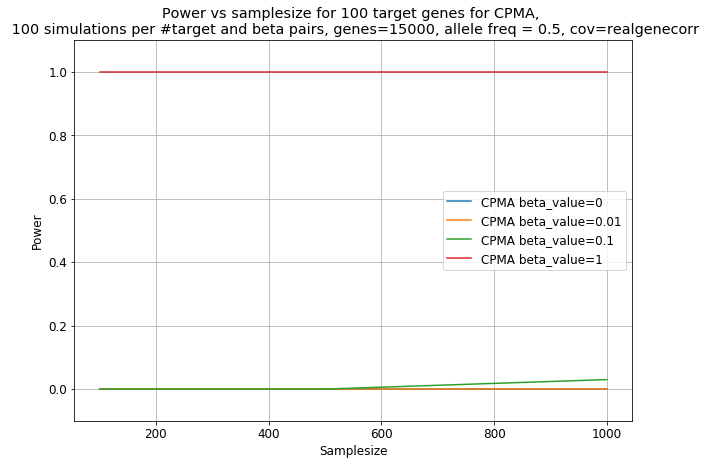

In [30]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}

plt.rc('font', **font)

def plot_power(target, beta_values, samplesize, fname, label_name):
    power = []
    for beta in beta_values:
        for s in samplesize:   
            value = str(beta).replace(".","")
            path = f'/gymreklab-tscc/cynthiawu/Test_nullsnps/simulate_eqtls_only/FastMultivariate/Single_eqtl/SampleSize{s}/SingleParameter/numTarget_{target}/Beta_{value}/{fname}'
            cur_file = pd.read_csv(path, sep='\t')
            power.append(float(cur_file['power_adjusted']))
        plt.plot(samplesize, power, label=f'{label_name}={beta}')
        power = []
    
plt.figure(figsize=(10,7))


beta_values = [0, 0.01, 0.1, 1]

samplesize = [100, 500, 1000]
target = 100

plot_power(target, beta_values, samplesize, 'power_cpmax_1.0_adjusted_realnumsnps.txt', 'CPMA beta_value')
# plot_power(target, beta_values, samplesize, 'power_matrix-eqtl_onesuccess_realnumsnps.txt', 'Pairwise beta value') 
# plot_power(target, beta_values, samplesize, 'power_mixtureModel_adjusted_realnumsnps.txt', 'mixtureModel beta_value')

      
plt.xlabel('Samplesize')
plt.ylabel('Power')
plt.title('Power vs samplesize for 100 target genes for CPMA, \n 100 simulations per #target and beta pairs, genes=15000, allele freq = 0.5, cov=realgenecorr')
plt.ylim(-0.1, 1.1)
plt.grid(True)
plt.legend()
    

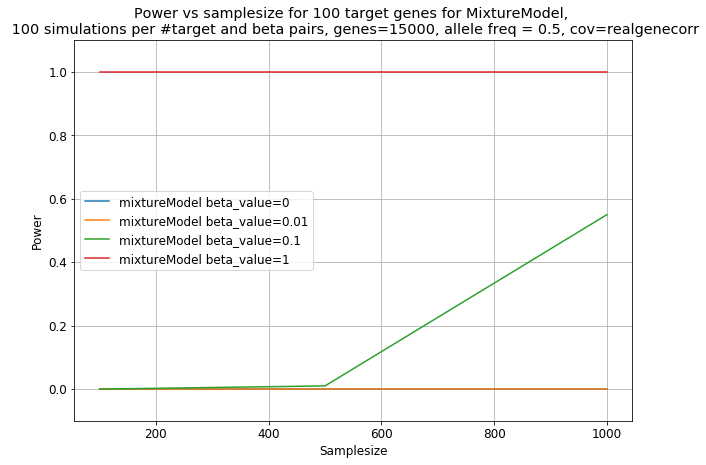

In [28]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}

plt.rc('font', **font)

def plot_power(target, beta_values, samplesize, fname, label_name):
    power = []
    for beta in beta_values:
        for s in samplesize:   
            value = str(beta).replace(".","")
            path = f'/gymreklab-tscc/cynthiawu/Test_nullsnps/simulate_eqtls_only/FastMultivariate/Single_eqtl/SampleSize{s}/SingleParameter/numTarget_{target}/Beta_{value}/{fname}'
            cur_file = pd.read_csv(path, sep='\t')
            power.append(float(cur_file['power_adjusted']))
        plt.plot(samplesize, power, label=f'{label_name}={beta}')
        power = []
    
plt.figure(figsize=(10,7))


beta_values = [0, 0.01, 0.1, 1]

samplesize = [100, 500, 1000]
target = 100

# plot_power(target, beta_values, samplesize, 'power_cpmax_1.0_adjusted_realnumsnps.txt', 'CPMA beta_value')
# plot_power(target, beta_values, samplesize, 'power_matrix-eqtl_onesuccess_realnumsnps.txt', 'Pairwise beta value') 
plot_power(target, beta_values, samplesize, 'power_mixtureModel_adjusted_realnumsnps.txt', 'mixtureModel beta_value')

      
plt.xlabel('Samplesize')
plt.ylabel('Power')
plt.title('Power vs samplesize for 100 target genes for MixtureModel, \n 100 simulations per #target and beta pairs, genes=15000, allele freq = 0.5, cov=realgenecorr')
plt.ylim(-0.1, 1.1)
plt.grid(True)
plt.legend()
    

### D: Target genes = 1000

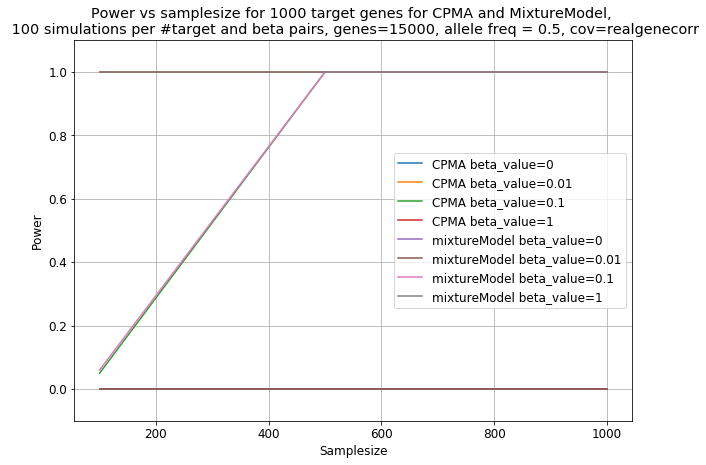

In [21]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}

plt.rc('font', **font)

def plot_power(target, beta_values, samplesize, fname, label_name):
    power = []
    for beta in beta_values:
        for s in samplesize:   
            value = str(beta).replace(".","")
            path = f'/gymreklab-tscc/cynthiawu/Test_nullsnps/simulate_eqtls_only/FastMultivariate/Single_eqtl/SampleSize{s}/SingleParameter/numTarget_{target}/Beta_{value}/{fname}'
            cur_file = pd.read_csv(path, sep='\t')
            power.append(float(cur_file['power_adjusted']))
        plt.plot(samplesize, power, label=f'{label_name}={beta}')
        power = []
    
plt.figure(figsize=(10,7))


beta_values = [0, 0.01, 0.1, 1]

samplesize = [100, 500, 1000]
target = 1000

plot_power(target, beta_values, samplesize, 'power_cpmax_1.0_adjusted_realnumsnps.txt', 'CPMA beta_value')
# plot_power(target, beta_values, samplesize, 'power_matrix-eqtl_onesuccess_realnumsnps.txt', 'Pairwise beta value') 
plot_power(target, beta_values, samplesize, 'power_mixtureModel_adjusted_realnumsnps.txt', 'mixtureModel beta_value')

      
plt.xlabel('Samplesize')
plt.ylabel('Power')
plt.title('Power vs samplesize for 1000 target genes for CPMA and MixtureModel, \n 100 simulations per #target and beta pairs, genes=15000, allele freq = 0.5, cov=realgenecorr')
plt.ylim(-0.1, 1.1)
plt.grid(True)
plt.legend()
    